This notebook contains implementation to predict Autism in children using Classification algorithms.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, feature_selection, linear_model, ensemble

Read autism data into pandas dataframe and check shape

In [2]:
autism_data = pd.read_csv('Autism-Child-Data.csv')
autism_data.shape


(292, 22)

Check the dataframe

In [3]:
autism_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


Check for null values or invalid patterns like ?

In [4]:
(autism_data == '?').any()

id                 False
A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                 True
gender             False
ethnicity           True
jaundice           False
autism             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation            True
Class/ASD          False
dtype: bool

Replace ? with np.NaN

In [5]:
autism_data = autism_data.replace(['?'], np.nan)
autism_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


Check dataframe for null values

In [6]:
autism_data.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jaundice            0
autism              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

Impute the data using SimpleImputer

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

numImputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
numImputer = numImputer.fit(autism_data[['age']])
autism_data['age'] = numImputer.transform(autism_data[['age']])
autism_data['age'] = round(autism_data['age'])

catImputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
catImputer = catImputer.fit(autism_data[['ethnicity','relation']])
autism_data[['ethnicity','relation']] = catImputer.transform(autism_data[['ethnicity','relation']])

autism_data.isnull().any()

id                 False
A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                False
gender             False
ethnicity          False
jaundice           False
autism             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
Class/ASD          False
dtype: bool

Get statistical information

In [8]:
autism_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.349315,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.349504,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


Get cardinality of the columns

In [9]:
autism_data.nunique()

id                 292
A1_Score             2
A2_Score             2
A3_Score             2
A4_Score             2
A5_Score             2
A6_Score             2
A7_Score             2
A8_Score             2
A9_Score             2
A10_Score            2
age                  8
gender               2
ethnicity           10
jaundice             2
autism               2
contry_of_res       52
used_app_before      2
result              11
age_desc             1
relation             5
Class/ASD            2
dtype: int64

Encode data to binarised form using Ordinal Encoder and Label Encoder

In [10]:
autism_data.drop(columns = 'age_desc', inplace=True, axis = 1)

ordinal_encoder = preprocessing.OrdinalEncoder()
autism_data[['gender', 'ethnicity','jaundice', 'autism','contry_of_res','used_app_before','relation']] = ordinal_encoder.fit_transform(autism_data[['gender', 'ethnicity','jaundice', 'autism','contry_of_res','used_app_before','relation']])

label_encoder = preprocessing.LabelEncoder()
autism_data['Class/ASD']= label_encoder.fit_transform(autism_data['Class/ASD'])

autism_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,6.0,1.0,5.0,0.0,0.0,24.0,0.0,5,1.0,0
1,2,1,1,0,0,1,1,0,1,0,...,6.0,1.0,4.0,0.0,0.0,24.0,0.0,5,1.0,0
2,3,1,1,0,0,0,1,1,1,0,...,6.0,1.0,9.0,0.0,0.0,24.0,1.0,5,1.0,0
3,4,0,1,0,0,1,1,0,0,0,...,5.0,0.0,9.0,1.0,0.0,24.0,0.0,4,1.0,0
4,5,1,1,1,1,1,1,1,1,1,...,5.0,1.0,5.0,1.0,0.0,51.0,0.0,10,1.0,1


Save processed data for Azure machine learning implementation

In [11]:
autism_data.to_excel('/Users/darshinishridhar/Documents/MSc_Data_Science_content/Term1_Sept-Dec_2022/MLDM/Assessment/Processed_autism_data.xlsx', header=True)


Check class imbalance by plotting counts of label class

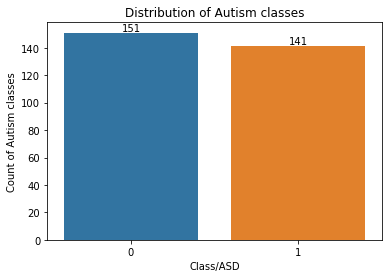

In [12]:
ax = sns.countplot(x = autism_data['Class/ASD'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Distribution of Autism classes')
plt.xlabel('Class/ASD')
plt.ylabel('Count of Autism classes')
plt.show()

Plot histogram to check distribution of result variable

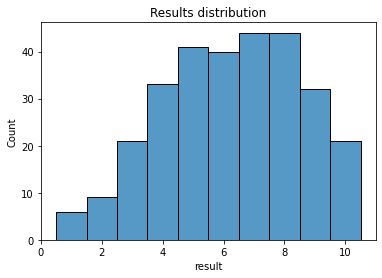

In [13]:
sns.histplot(autism_data['result'],bins=np.arange(0.5, 11, 1))
plt.title('Results distribution')
plt.show()

Plot correlation of result and label class

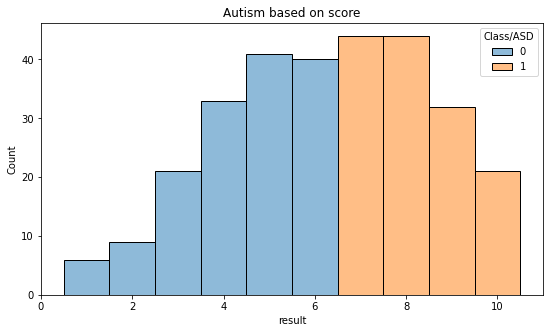

In [14]:
plt.figure(figsize = (9,5))
plt.title("Autism based on score")
sns.histplot(x='result', hue = "Class/ASD", data = autism_data, bins=np.arange(0.5, 11, 1))
plt.show()

Drop unwanted columns

In [15]:
autism_subset = autism_data.drop(['id',
                                  'A1_Score',
                                  'A2_Score',
                                  'A3_Score',
                                  'A4_Score',
                                  'A5_Score',
                                  'A6_Score',
                                  'A7_Score',
                                  'A8_Score',
                                  'A9_Score',
                                  'A10_Score',
                                  'used_app_before',
                                  'relation'], axis=1)
autism_subset

,age,gender,ethnicity,jaundice,autism,contry_of_res,result,Class/ASD
0,6.0,1.0,5.0,0.0,0.0,24.0,5,0
1,6.0,1.0,4.0,0.0,0.0,24.0,5,0
2,6.0,1.0,9.0,0.0,0.0,24.0,5,0
3,5.0,0.0,9.0,1.0,0.0,24.0,4,0
4,5.0,1.0,5.0,1.0,0.0,51.0,10,1
...,...,...,...,...,...,...,...,...
287,7.0,0.0,9.0,1.0,1.0,50.0,10,1
288,7.0,0.0,9.0,1.0,1.0,3.0,4,0
289,4.0,1.0,3.0,0.0,0.0,8.0,7,1
290,4.0,1.0,7.0,0.0,0.0,18.0,9,1


Plot correlation for Feature selection

Text(0.5, 1.0, 'pearson correlation')

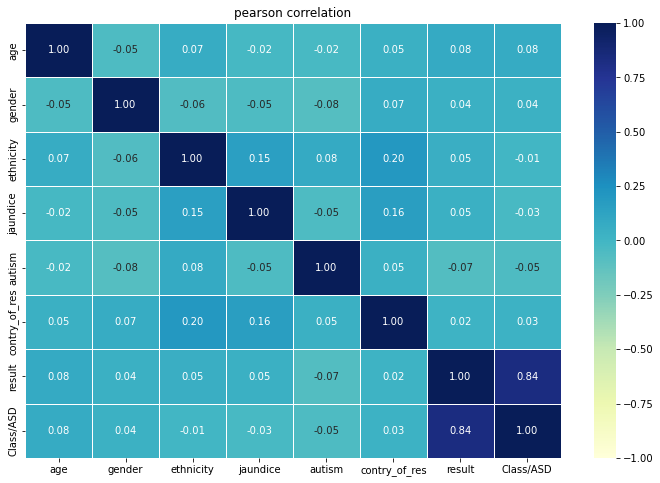

In [16]:
plt.figure(figsize = (12,8))
correlation_matrix = autism_subset.copy()
for col in correlation_matrix.columns:
    if correlation_matrix[col].dtype == "O":
         correlation_matrix[col] = correlation_matrix[col].factorize(sort=True)[0]
correlation_matrix = correlation_matrix.corr(method="pearson")
sns.heatmap(correlation_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

Use Anova and Lasso regularization to get appropriate features

<AxesSubplot:xlabel='selection', ylabel='features'>

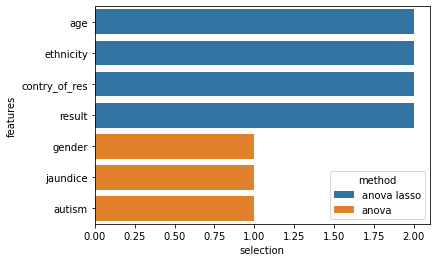

In [17]:
X = autism_subset.drop("Class/ASD", axis=1).values
y = autism_subset["Class/ASD"].values

feature_names = autism_subset.drop("Class/ASD", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func= feature_selection.f_classif, k=7).fit(X,y)
selected_features_anova = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.LogisticRegression(C=1, penalty="l1", solver='liblinear'), max_features=7).fit(X,y)
selected_features_lasso = feature_names[selector.get_support()]
 
## Plot
autism_features = pd.DataFrame({"features":feature_names})
autism_features["anova"] = autism_features["features"].apply(lambda x: "anova" if x in selected_features_anova else "")
autism_features["num1"] = autism_features["features"].apply(lambda x: 1 if x in selected_features_anova else 0)
autism_features["lasso"] = autism_features["features"].apply(lambda x: "lasso" if x in selected_features_lasso else "")
autism_features["num2"] = autism_features["features"].apply(lambda x: 1 if x in selected_features_lasso else 0)
autism_features["method"] = autism_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
autism_features["selection"] = autism_features["num1"] + autism_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=autism_features.sort_values("selection", ascending=False), dodge=False)

Split the data to train and test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Use MinMaxScaler to scale the data

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

Initialise KNN classifier to train the model using fit function

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

Predict the values using the model built and print predicted values

In [21]:
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 0 0]


Print test values

In [22]:
print(y_test)

[0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 0]


Get metrics for model evaluation

In [23]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('-----------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.83


Confusion Matrix:
[[38  4]
 [11 35]] 


-----------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        42
           1       0.90      0.76      0.82        46

    accuracy                           0.83        88
   macro avg       0.84      0.83      0.83        88
weighted avg       0.84      0.83      0.83        88



Plot confusion matrix heatmap

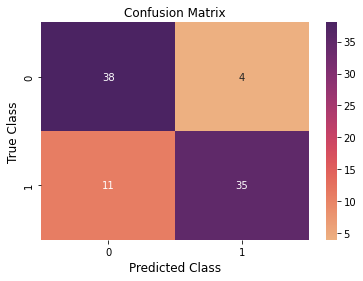

In [24]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)

plt.show()